## Review
### This recitation (09.20) covers two following lectures below:
- **09.13 (Wed)**
- **09:18 (Mon)**

In [ ]:
import numpy as np
np.random.seed(20230920)

### CIFAR10

<img src="https://drive.google.com/uc?export=view&id=1_--V7VJMvHGjjQZ4tyUWYRPK4LhBhqgJ" alt="Drawing" height=300 />

The **CIFAR-10** dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class.

In [ ]:
# import torchvision and matplotlib to download and visualize cifar10
import torchvision
from matplotlib.pyplot import imshow

In [ ]:
# download cifar10
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified


image shape : (32, 32, 3)
This is an image of [deer].


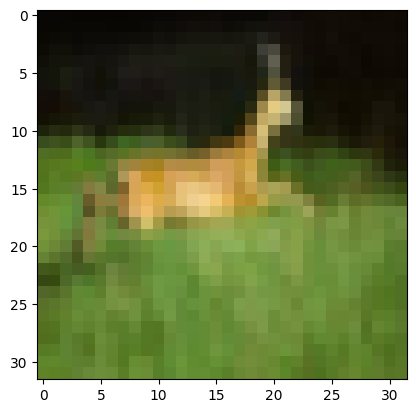

In [ ]:
# select random image among index 0-49999
n = np.random.randint(50000)
sample_img = np.asarray(dataset[n][0])
yi = dataset[n][1]
img_class = classes[dataset[n][1]]

imshow(np.asarray(sample_img))
print(f"image shape : {sample_img.shape}")
print(f'This is an image of [{img_class}].')

In [ ]:
# convert image into vector
# you need a vector to calculate loss with your classifers (SVM, softmax)
img_vector = sample_img.reshape(-1)
img_vector = img_vector / np.max(img_vector)

print(img_vector.shape)

(3072,)


### SVM


<img src="https://drive.google.com/uc?export=view&id=1ehncpsujeUUoQjjQuF-JuzwjPTV0S_oK" alt="Drawing" height=300 />
<img src="https://drive.google.com/uc?export=view&id=1jNtrYwrca2FjrCd_A2e3nD8MUvnv62ek" alt="Drawing" height=150 />

The hinge loss/error function (SVM) is the typical loss function used for binary classification (but it can also be extended to multi-class classification) in the context of support vector machines.

#### ppp exercise 1
To predict the class of your data, we need a linear classifier.
In this exercise, you need to make your classifiers that can predict **among 10 classes**.

In [ ]:
import doctest

In [ ]:
def make_your_classifier(num_classes):
  # YOUR CODE HERE
  W = np.random.randn(3072, 10)

  return W

Test your classifier, in this case, since W is randomly initialized the prediced class may not equal to answer class.

In [ ]:
W = make_your_classifier(10)
assert W.shape == (3072, 10), "Check your classifier! "

score = W.T @ img_vector
prediction = np.argmax(score)

print(f'Predicted class is [{classes[np.argmax(score)]}].')
print(f'Answer yi class : {img_class}')
print(f'Answer yi score :{score[np.argmax(score)]: .4f}')

Predicted class is [dog].
Answer yi class : deer
Answer yi score : 34.6293


#### ppp exercise 2
Calcualte SVM Loss with **delta value** 1.0.


In [ ]:
# classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def svm_loss_1(img_class, score, delta = 1.0):

  # YOUR CODE HERE
  score = score - score[img_class] + delta
  score[img_class] = 0
  margin = np.maximum(score, 0)

  loss = np.sum(margin)

  return loss

In [ ]:
loss_svm_1 = svm_loss_1(yi, score)
print(f'loss: {loss_svm_1: .4f}')

loss:  31.3677


#### ppp exercise 3
Calcualte SVM Loss with **delta value** 100.0.

Additionally, normalize your score matrix with max value.

In [ ]:
def svm_loss_100(img_class, score, normalize=False, delta = 100.0):

  # YOUR CODE HERE
  score = score - score[img_class] + delta
  score[img_class] = 0
  if normalize:
    score = score / np.max(score)

  margin = np.maximum(score, 0)

  loss = np.sum(margin)

  return loss

In [ ]:
loss_svm_100 = svm_loss_100(yi, score)
print(f'loss: {loss_svm_100: .4f}')

loss:  738.7011


In [ ]:
loss_svm_100 = svm_loss_100(yi, score, normalize=True)
print(f'loss: {loss_svm_100: .4f}')

loss:  5.8232


#### **Discussion**
1. Let’s talk about the change in loss value according to delta value  (1.0 and 100.0).

2. Let’s talk about the change in loss value according to normalization.




In [ ]:
# why delta=100 has larger loss value?

print(f'delta=1 ({loss_svm_1:.4f}) < delta=100 ({loss_svm_100:.4f})')

delta=1 (31.3677) < delta=100 (738.7011)


### Softmax

<img src="https://drive.google.com/uc?export=view&id=1435FhwTC4_uPkbLZ4IPzGCrjN-mnzHEY" alt="Drawing" height=200 />

**Softmax Loss** is actually just a Softmax Activation plus a Cross-Entropy Loss. Softmax is an activation function that outputs the probability for each class and these probabilities will sum up to one. Cross Entropy loss is just the sum of the negative logarithm of the probabilities.

#### ppp exercise 4
Calcualte Softmax Loss and see details of your score matrix.
Then, compare with that of SVM loss.

In [ ]:
def softmax_loss(img_class, score):

  # YOUR CODE HERE
  m = np.max(score)
  exp_x = np.exp(score - m)
  sum_exp_x = np.sum(exp_x)

  softmax = exp_x / sum_exp_x
  y = softmax[img_class]
  loss = -np.log(y)

  return loss

In [ ]:
loss_smx = softmax_loss(yi, score)
print(f'loss: {loss_smx: .4f}')

loss:  26.8553


### New data

When new data comes in, the softmax loss always changes, but the SVM loss may not.

```
new_data = np.asarray(dataset[k][0])
new_data_class = ???

```

New image of [car].


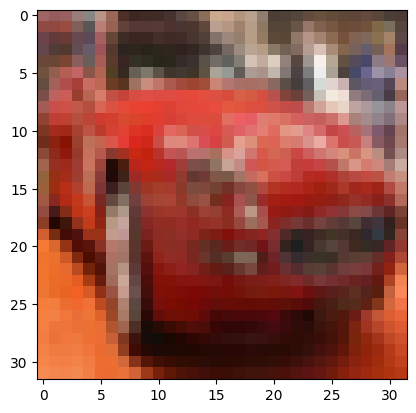

In [ ]:
k = 5
new_data = np.asarray(dataset[k][0])
new_data_class = classes[dataset[k][1]]
new_yi = dataset[k][1]

imshow(np.asarray(new_data))i l
print(f'New image of [{new_data_class}].')

new_img_vector = new_data.reshape(-1)
new_img_vector = new_img_vector / np.max(new_img_vector)

In [ ]:
# calculate loss (SVM and Softmax) of new data
score = W.T @ new_img_vector
prediction = np.argmax(score)

print(f'Predicted class is [{classes[np.argmax(score)]}].')
print(f'Answer new yi class : {new_data_class}')
print(f'Answer new yi score :{score[np.argmax(score)]: .4f}')

Predicted class is [dog].
Answer new yi class : car
Answer new yi score : 19.1366


In [ ]:
# calculate both losses
loss_smx = softmax_loss(new_yi, score)
loss_svm_1 = svm_loss_1(new_yi, score)

print(f'SVM loss: {loss_svm_1: .4f}')
print(f'softmax loss: {loss_smx: .4f}')

SVM loss:  25.0081
softmax loss:  14.3469


In [ ]:
# Assume score of extreme case
# This is a case where the value of the correct answer label in the score matrix is ​​large enough
# so that all margin values ​​are 0.

score[new_yi] = np.max(score) + 1

loss_smx = softmax_loss(new_yi, score)
loss_svm_1 = svm_loss_1(new_yi, score)

print(f'SVM loss: {loss_svm_1: .4f}')
print(f'softmax loss: {loss_smx: .4f}')

SVM loss:  0.0000
softmax loss:  0.3142
